In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = '../data'

In [2]:
df = pd.read_csv(data_dir + '/pd_speech_features.csv')
display(df)
print(df.shape)
y = df['class']

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


(756, 755)


In [3]:
features = list(df.columns)
features.remove('id')
features.remove('class')

In [4]:
# find all the features which correlate to each other, and drop them
# https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

high_corr_thresh = 0.985

df_features = df[features]
pearson_all = df_features.corr(method='pearson')
display(pearson_all)

# get the upper right triangle (not including diagonal)
upper_tri = pearson_all.where(np.triu(np.ones(pearson_all.shape), k=1).astype(bool))
display(upper_tri)

# find columns to drop
to_drop = [col for col in upper_tri.columns if any(abs(upper_tri[col]) > high_corr_thresh)]
print(to_drop)
print(f"\n---- number of features to drop due to high correlation = {len(to_drop)} ----\n")

# convert column names to indices and drop
to_drop_ind = [ii for ii in range(len(pearson_all.columns)) if pearson_all.columns[ii] in to_drop]
print(to_drop_ind)
print(f"\n---- number of features to drop due to high correlation = {len(to_drop_ind)} ----\n")
print(len(to_drop_ind)/df_features.shape[1])

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
gender,1.000000,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,0.147604,...,-0.273543,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828
PPE,0.010175,1.000000,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,-0.331009,...,0.112430,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588
DFA,0.099356,-0.094775,1.000000,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,0.201248,...,-0.199388,-0.146325,-0.104456,-0.061129,-0.063451,-0.061845,-0.033914,0.043454,0.067843,0.116699
RPDE,0.168321,-0.405558,0.155075,1.000000,-0.521193,-0.524839,0.506707,0.333545,0.614340,0.608966,...,-0.327460,-0.315592,-0.278504,-0.148989,-0.101467,-0.098923,-0.097161,-0.036406,-0.018052,0.021945
numPulses,-0.478367,0.191535,-0.286791,-0.521193,1.000000,0.999917,-0.897079,-0.187478,-0.426350,-0.516920,...,0.405103,0.268896,0.177255,0.043963,-0.024223,-0.036158,-0.047946,-0.068664,-0.069645,-0.062925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_32,0.089793,0.044163,-0.061845,-0.098923,-0.036158,-0.035954,0.035461,-0.092488,0.003916,0.014013,...,0.143156,0.283748,0.525901,0.768073,0.927854,1.000000,0.945107,0.729501,0.609663,0.467944
tqwt_kurtosisValue_dec_33,0.107618,0.045755,-0.033914,-0.097161,-0.047946,-0.047837,0.039487,-0.092429,0.018504,0.029028,...,0.084178,0.239203,0.486570,0.708646,0.841365,0.945107,1.000000,0.824620,0.698738,0.543845
tqwt_kurtosisValue_dec_34,0.128936,0.046175,0.043454,-0.036406,-0.068664,-0.068561,0.046140,-0.061721,0.027886,0.026556,...,0.017254,0.139668,0.383328,0.587449,0.667325,0.729501,0.824620,1.000000,0.948008,0.785141
tqwt_kurtosisValue_dec_35,0.107734,0.037385,0.067843,-0.018052,-0.069645,-0.069468,0.040828,-0.067636,0.010553,0.007976,...,-0.032719,0.054510,0.275390,0.477147,0.550686,0.609663,0.698738,0.948008,1.000000,0.866696


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
gender,NaN,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,0.147604,...,-0.273543,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828
PPE,NaN,NaN,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,-0.331009,...,0.112430,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588
DFA,NaN,NaN,NaN,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,0.201248,...,-0.199388,-0.146325,-0.104456,-0.061129,-0.063451,-0.061845,-0.033914,0.043454,0.067843,0.116699
RPDE,NaN,NaN,NaN,NaN,-0.521193,-0.524839,0.506707,0.333545,0.614340,0.608966,...,-0.327460,-0.315592,-0.278504,-0.148989,-0.101467,-0.098923,-0.097161,-0.036406,-0.018052,0.021945
numPulses,NaN,NaN,NaN,NaN,NaN,0.999917,-0.897079,-0.187478,-0.426350,-0.516920,...,0.405103,0.268896,0.177255,0.043963,-0.024223,-0.036158,-0.047946,-0.068664,-0.069645,-0.062925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.945107,0.729501,0.609663,0.467944
tqwt_kurtosisValue_dec_33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824620,0.698738,0.543845
tqwt_kurtosisValue_dec_34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.948008,0.785141
tqwt_kurtosisValue_dec_35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866696


['numPeriodsPulses', 'ddpJitter', 'locDbShimmer', 'ddaShimmer', 'meanNoiseToHarmHarmonicity', 'meanIntensity', 'det_TKEO_mean_1_coef', 'det_TKEO_mean_2_coef', 'det_TKEO_mean_3_coef', 'det_TKEO_mean_4_coef', 'det_TKEO_mean_7_coef', 'det_TKEO_mean_8_coef', 'det_TKEO_mean_9_coef', 'det_TKEO_mean_10_coef', 'det_TKEO_std_5_coef', 'det_TKEO_std_6_coef', 'det_TKEO_std_7_coef', 'det_TKEO_std_8_coef', 'det_TKEO_std_10_coef', 'app_entropy_shannon_2_coef', 'app_entropy_shannon_3_coef', 'app_entropy_shannon_4_coef', 'app_entropy_shannon_5_coef', 'app_entropy_shannon_6_coef', 'app_entropy_shannon_7_coef', 'app_entropy_shannon_8_coef', 'app_entropy_shannon_9_coef', 'app_entropy_shannon_10_coef', 'app_entropy_log_2_coef', 'app_entropy_log_3_coef', 'app_entropy_log_4_coef', 'app_entropy_log_5_coef', 'app_entropy_log_6_coef', 'app_entropy_log_7_coef', 'app_entropy_log_8_coef', 'app_entropy_log_9_coef', 'app_entropy_log_10_coef', 'app_det_TKEO_mean_5_coef', 'app_det_TKEO_mean_6_coef', 'app_det_TKEO_mean

In [5]:
# remove highly correlated features and SAVE the df

orig_num_features = df.shape[1]
df = df.drop(df.columns[to_drop_ind], axis=1)

display(df)
print(df.shape)
print(orig_num_features - len(to_drop))

,id,gender,PPE,DFA,RPDE,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


(756, 629)
629


In [6]:
pearson = df.corr(method='pearson')['class']
print(pearson)
print(type(pearson))

id                          -0.111661
gender                       0.182713
PPE                         -0.072939
DFA                          0.306070
RPDE                         0.247444
                               ...   
tqwt_kurtosisValue_dec_33    0.119808
tqwt_kurtosisValue_dec_34    0.192345
tqwt_kurtosisValue_dec_35    0.219454
tqwt_kurtosisValue_dec_36    0.279827
class                        1.000000
Name: class, Length: 629, dtype: float64
<class 'pandas.core.series.Series'>


In [7]:
# low_corr_cutoff = 0.003  # 80, 89, 84, 86 [log regr - accuracy, precision, recall, f1]
# low_corr_cutoff = 0.01   # 81, 90, 84, 87
low_corr_cutoff = 0.03   # 81, 89, 85, 87
# low_corr_cutoff = 0.1    # 82, 92, 83, 87 (slow)
# low_corr_cutoff = 0.2    # 82, 91, 83, 87 (slow)
# low_corr_cutoff = 0.25   # 78, 90, 79, 84 (slow)
# low_corr_cutoff = 0.3    # 75, 88, 78, 83

omit_these_features = pearson[abs(pearson) <= low_corr_cutoff].index
omit_these_features = list(omit_these_features)
# omit_these_features.remove('id')
print(omit_these_features, '\n')
print(len(omit_these_features), len(omit_these_features)/(df.shape[1] - 2))

['f4', 'b1', 'b2', 'mean_MFCC_12th_coef', 'mean_3rd_delta', 'mean_6th_delta', 'mean_7th_delta', 'mean_8th_delta', 'mean_9th_delta', 'mean_10th_delta', 'mean_11th_delta', 'mean_12th_delta', 'mean_delta_delta_log_energy', 'mean_delta_delta_0th', 'mean_1st_delta_delta', 'mean_2nd_delta_delta', 'mean_3rd_delta_delta', 'mean_5th_delta_delta', 'mean_6th_delta_delta', 'mean_7th_delta_delta', 'mean_8th_delta_delta', 'mean_9th_delta_delta', 'mean_12th_delta_delta', 'std_MFCC_2nd_coef', 'Ea', 'Ed_1_coef', 'Ed_2_coef', 'Ed_3_coef', 'Ed_4_coef', 'Ed_5_coef', 'Ed_6_coef', 'Ed_8_coef', 'Ed_9_coef', 'det_entropy_shannon_1_coef', 'det_entropy_shannon_5_coef', 'det_entropy_shannon_6_coef', 'det_entropy_shannon_7_coef', 'det_entropy_shannon_9_coef', 'det_entropy_shannon_10_coef', 'det_entropy_log_7_coef', 'det_entropy_log_8_coef', 'det_entropy_log_9_coef', 'det_TKEO_mean_5_coef', 'det_TKEO_mean_10_coef', 'det_TKEO_std_1_coef', 'det_TKEO_std_2_coef', 'det_TKEO_std_10_coef', 'Ed2_1_coef', 'Ed2_2_coef', 'E

I will remove features which have a "(very) low" correlation with the class. A weak correlation is generally considered to be less than 0.3, but if I set corr_cutoff to 0.3 I lose 704 of the 753 features. So, through some trial and error, I set an appropriate corr_cutoff.

In [8]:
features = list(df.columns)
features.remove('id')
features.remove('class')

remaining_features = features.copy()
for ff in omit_these_features:
#     print(ff)
    remaining_features.remove(ff)
print(len(remaining_features))

478


In [9]:
# reduce and SAVE the df

df = df[['id'] + remaining_features + ['class']]
display(df)
df.to_csv(data_dir + '/pd_speech_features_reduced.csv', index=None)

,id,gender,PPE,DFA,RPDE,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,239,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,233,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,231,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,177,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,235,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,416,0.004627,0.000052,0.00064,0.000003,...,3.4394,3.0706,3.0190,3.1212,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,413,0.004550,0.000220,0.00143,0.000006,...,19.6733,1.9704,1.7451,1.8277,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,380,0.005069,0.000103,0.00076,0.000004,...,137.3126,51.5607,44.4641,26.1586,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,339,0.005679,0.000055,0.00092,0.000005,...,5.4425,19.1607,12.8312,8.9434,1.9496,1.9664,2.6801,2.8332,3.7131,0


I will now check the spearman correlation coefficient, which captures a sense of non-linear correlations, and then compare them to the pearson correlation coefficients.

In [10]:
spearman = df.corr(method='spearman')['class']
print(spearman)
print(type(spearman))

id                          -0.111661
gender                       0.182713
PPE                         -0.126365
DFA                          0.300818
RPDE                         0.235616
                               ...   
tqwt_kurtosisValue_dec_33    0.131712
tqwt_kurtosisValue_dec_34    0.237802
tqwt_kurtosisValue_dec_35    0.252416
tqwt_kurtosisValue_dec_36    0.281066
class                        1.000000
Name: class, Length: 480, dtype: float64
<class 'pandas.core.series.Series'>


In [11]:
high_corr_features = [ff for ff in remaining_features if abs(pearson[ff]) >= 0.3]
print(high_corr_features)
print(len(high_corr_features))

['DFA', 'mean_MFCC_2nd_coef', 'std_6th_delta', 'std_7th_delta', 'std_8th_delta', 'std_9th_delta', 'std_10th_delta', 'std_11th_delta', 'std_delta_delta_log_energy', 'std_6th_delta_delta', 'std_7th_delta_delta', 'std_8th_delta_delta', 'std_9th_delta_delta', 'std_10th_delta_delta', 'std_11th_delta_delta', 'std_12th_delta_delta', 'tqwt_energy_dec_12', 'tqwt_energy_dec_13', 'tqwt_energy_dec_15', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_12', 'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_14', 'tqwt_entropy_shannon_dec_15', 'tqwt_entropy_shannon_dec_16', 'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_log_dec_11', 'tqwt_entropy_log_dec_12', 'tqwt_entropy_log_dec_13', 'tqwt_entropy_log_dec_15', 'tqwt_entropy_log_dec_16', 'tqwt_TKEO_std_dec_11', 'tqwt_TKEO_std_dec_12', 'tqwt_stdValue_dec_10', 'tqwt_stdValue_dec_11', 'tqwt_stdValue_dec_12', 'tqwt_stdValue_dec_15', 'tqwt_stdValue_dec_16', 'tqwt_minValue_dec_11', 'tqwt_minValue_dec_12', 'tqwt_minValue_dec_13', 'tqwt_minValue

In [12]:
print("feature,    pearson,    spearman")
print("--------------------------------")
for ff in high_corr_features:
    print(f"{ff},    {pearson[ff]},    {spearman[ff]}")

feature,    pearson,    spearman
--------------------------------
DFA,    0.3060703713978527,    0.3008175650224533
mean_MFCC_2nd_coef,    0.39869532383637335,    0.367279101214638
std_6th_delta,    0.3231263403119249,    0.33088747422727455
std_7th_delta,    0.31982467016747,    0.3472417763435256
std_8th_delta,    0.3428754568881086,    0.3507577081140214
std_9th_delta,    0.3353955333035888,    0.3549629140791642
std_10th_delta,    0.3111600026884656,    0.32325686911825646
std_11th_delta,    0.3110077619771459,    0.3178820143280152
std_delta_delta_log_energy,    0.31868724939818777,    0.42026177006558796
std_6th_delta_delta,    0.3490458149141272,    0.3599757528602335
std_7th_delta_delta,    0.3542390686754891,    0.3799156108945492
std_8th_delta_delta,    0.3642562993989767,    0.3763648414416717
std_9th_delta_delta,    0.3643329784187203,    0.3850676698313248
std_10th_delta_delta,    0.3354082288382899,    0.34836273102770243
std_11th_delta_delta,    0.33535797371134013,    0

We see that the following features have a non-linear correlation with the class (diff > 0.05):
std_delta_delta_log_energy, tqwt_entropy_shannon_dec_12, tqwt_entropy_shannon_dec_13, tqwt_energy_dec_15, tqwt_entropy_shannon_dec_12.

And the following features are very linearily related to the class (diff < 0.005):
tqwt_entropy_shannon_dec_16, tqwt_entropy_shannon_dec_17, tqwt_stdValue_dec_12, **tqwt_minValue_dec_14**.

============================= I will now perform a PCA to check things out =============================

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
class RunPCA():
    def __init__(self, X: np.ndarray, y: pd.Series) -> None:
        self.X = X
        self.y = y
    
    def scale_X(self) -> None:
        sc = StandardScaler()
        self.X = sc.fit_transform(self.X)
    
    def exec_PCA(self) -> None:
        self.pca = PCA()
        self.X = self.pca.fit_transform(self.X)
    
    def set_ev(self) -> None:
        self.explained_variance = self.pca.explained_variance_ratio_
        self.num_components = len(self.explained_variance)
        print(f"number of components = {self.num_components}")
#         print(f"explained_variance = {self.explained_variance}")
        
        sum_cev = 0
        self.cummulative_ev = []
        for ii in range(self.num_components):
            sum_cev += self.explained_variance[ii]
            self.cummulative_ev.append(sum_cev)
#         print(f"cummulative_ev = {self.cummulative_ev}")
    
    def plot_ev(self) -> None:
        plt.figure()
        plt.bar(range(1, self.num_components+1), self.explained_variance)
        plt.title('explained variance')
        plt.xlabel('component')
        plt.ylabel('percent explained')
        plt.show()
        plt.close()
    
    def plot_cev(self) -> None:
        plt.figure()
        plt.bar(range(1, self.num_components+1), self.cummulative_ev)
        plt.title('cummulative explained variance')
        plt.xlabel('component')
        plt.ylabel('percent explained')
        plt.show()
        plt.close()
    
    def plot_PCA(self) -> None:        
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y)
        plt.title('PC1 vs PC2')
        plt.xlabel(f"PC1 = {100*self.explained_variance[0]:.2f}%")
        plt.ylabel(f"PC2 = {100*self.explained_variance[1]:.2f}%")
        plt.colorbar()
        plt.show()
        plt.close()
        
        plt.figure()
        plt.scatter(self.X[:, 1], self.X[:, 2], c=self.y)
        plt.title('PC2 vs PC3')
        plt.xlabel(f"PC1 = {100*self.explained_variance[1]:.2f}%")
        plt.ylabel(f"PC2 = {100*self.explained_variance[2]:.2f}%")
        plt.colorbar()
        plt.show()
        plt.close()
    
    def run(self) -> None:
        self.scale_X()
        self.exec_PCA()
        self.set_ev()
        self.plot_ev()
        self.plot_cev()
        self.plot_PCA()

number of components = 478


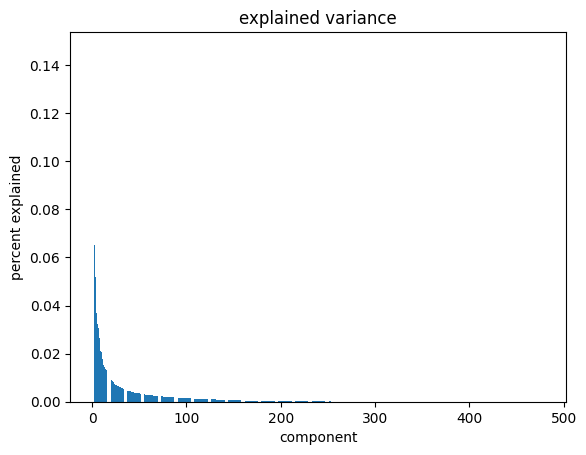

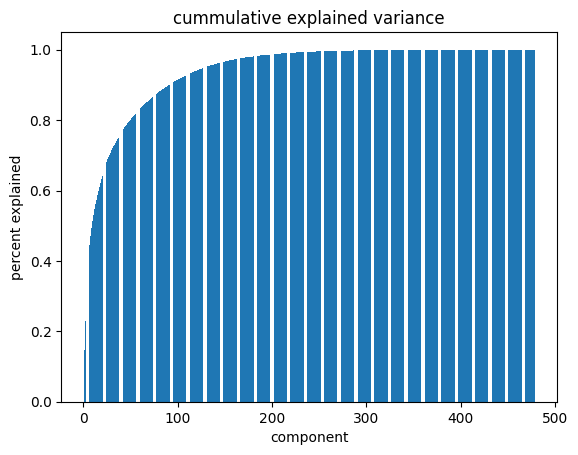

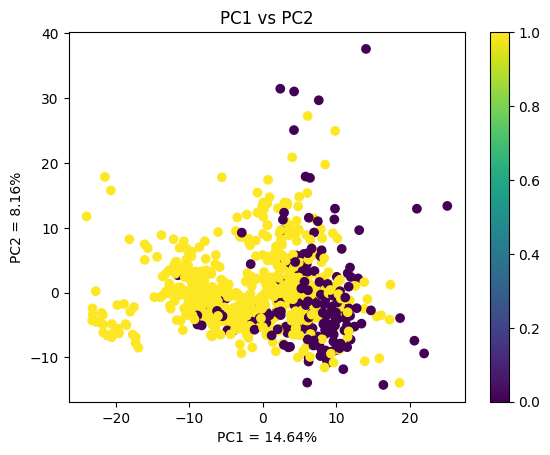

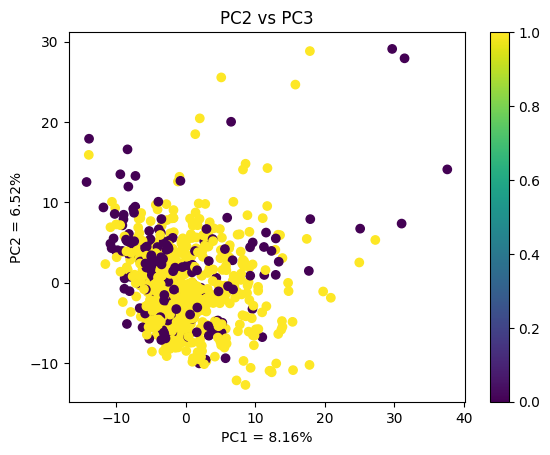

In [15]:
X = df[remaining_features].values
rpca = RunPCA(X, y)
rpca.run()

X = rpca.X

In PC1 vs PC2 we can see a separation of the classes, which is hopeful!

============================= I will now run a UMAP embedding on the PCA =============================

In [16]:
import umap

/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlie/virtualenvs/vpaud/lib/python3.9/site-packages/umap/distances.

In [17]:
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings = reducer.fit_transform(X)

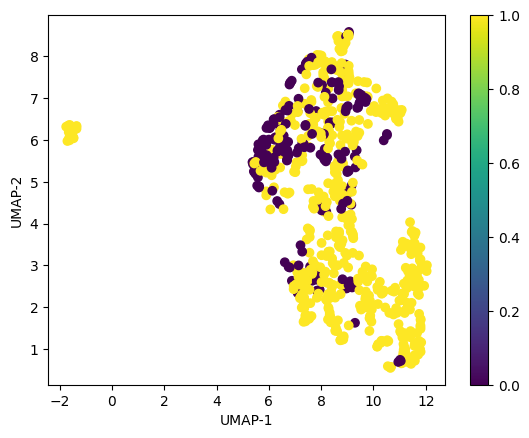

In [18]:
plt.figure()
plt.scatter(embeddings[:, 0],embeddings[:, 1], c=y)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.show()
plt.close()

============================= I will now find and remove some outliers =============================

I will remove outliers based on high "leverage" - which is the deviation of the sample in the feature space compared to the general clustering of the samples. They can be calculated via $H_{ii} = [X(X^TX)^{-1}X^T]_{ii}$ for the i-th sample, and "high" happens for $H_{ii} > 2\bar{H_{ii}} = 2p/n$.

In [19]:
H = X@np.linalg.pinv(X.T@X)@X.T
Hii = np.diag(H)

In [20]:
out_thresh = 2*X.shape[1]/X.shape[0]
print(f"the threshold for high is: 2p/n = 2*{X.shape[1]}/{X.shape[0]} = {out_thresh} == {2*Hii.mean()} = 2*mean(H_ii)")

the threshold for high is: 2p/n = 2*478/756 = 1.2645502645502646 == 1.2645502645502646 = 2*mean(H_ii)


In [21]:
for ii in range(len(Hii)):
    print(ii, Hii[ii])

0 0.4481656369229823
1 0.540815346325505
2 0.4971550046582227
3 0.8668531896266382
4 0.7590341163666643
5 0.8946548201068227
6 0.6540712126414385
7 0.6443980215451947
8 0.5061050639679794
9 0.49599334813241414
10 0.5339491813067577
11 0.4293022710455442
12 0.5877191851197954
13 0.5011222331165105
14 0.4984933292078476
15 0.7841944544509192
16 0.6500440380273795
17 0.8774969911014936
18 0.610661839509751
19 0.6221345804349335
20 0.5147390388711494
21 0.743406393924824
22 0.7723560595271384
23 0.9117824335783676
24 0.694843256844631
25 0.8652818282387165
26 0.820059519275663
27 0.4850334456664212
28 0.8173491693515289
29 0.3955375015480362
30 0.6967284501147555
31 0.8321991798775024
32 0.9045430026655168
33 0.6274408442015627
34 0.549934686724481
35 0.6337494992459117
36 0.5638769533139499
37 0.6253984806610713
38 0.6076820947283458
39 0.6862504133949325
40 0.8646887440915166
41 0.620159036149944
42 0.47231981487716723
43 0.45168814278183744
44 0.4307078473213568
45 0.5668230259301126
46

In [31]:
# check = out_thresh
check = 0.99

ind = list(np.where(Hii > check)[0])
print(type(ind))
print(ind)
print(len(ind), len(ind)/len(Hii))

<class 'list'>
[468, 469, 470, 550, 596, 606, 608, 631, 732]
9 0.011904761904761904


There were no hits for the condition that $H_{ii} > 2\bar{H_{ii}} = 2p/n$, so I tweaked the threashold down to remove <~ 1% of the points, ie, the top 1% of the highest leverage points.

In [32]:
# remove outliers and SAVE the df

df_outrmv = df.drop(index=ind).copy()
display(df_outrmv)
df_outrmv.to_csv(data_dir + '/pd_speech_features_reduced_outrmv.csv', index=None)
y = df_outrmv['class']

,id,gender,PPE,DFA,RPDE,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,239,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,233,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,231,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,177,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,235,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,416,0.004627,0.000052,0.00064,0.000003,...,3.4394,3.0706,3.0190,3.1212,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,413,0.004550,0.000220,0.00143,0.000006,...,19.6733,1.9704,1.7451,1.8277,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,380,0.005069,0.000103,0.00076,0.000004,...,137.3126,51.5607,44.4641,26.1586,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,339,0.005679,0.000055,0.00092,0.000005,...,5.4425,19.1607,12.8312,8.9434,1.9496,1.9664,2.6801,2.8332,3.7131,0


Now redo the PCA to see what changed...

number of components = 480


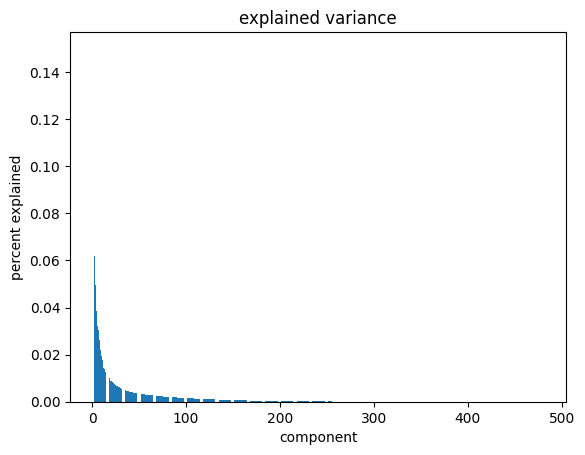

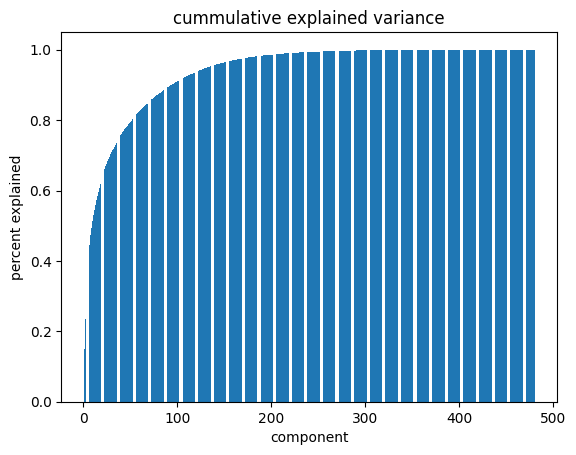

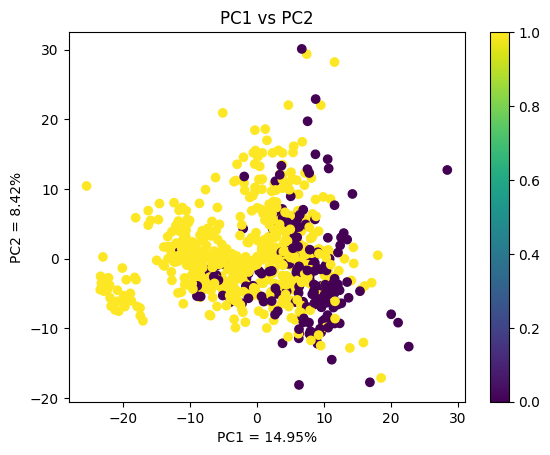

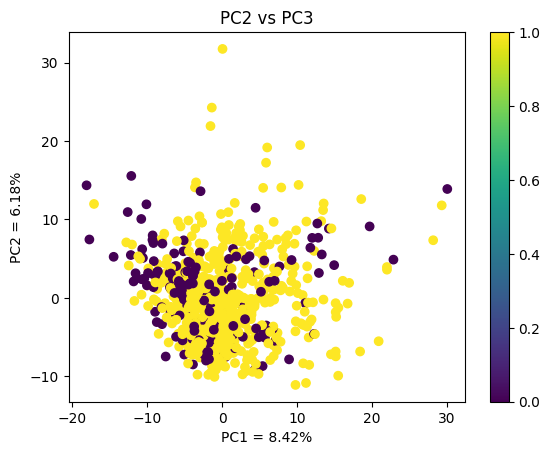

In [33]:
X = df_outrmv.values
rpca = RunPCA(X, y)
rpca.run()

============================= I will now balance the data for the neural net =============================

In [34]:
df_HC = df_outrmv[df_outrmv['class'] == 0]
df_PD = df_outrmv[df_outrmv['class'] == 1]

print(f"original num of HC =", len(df_HC))
print(f"original num of PD =", len(df_PD))

df_balanced = pd.concat([df_outrmv, df_HC.sample(n=len(df_PD)-len(df_HC), replace=True)]).reset_index(drop=True)
display(df_balanced)

print(f"num of HC =", len(df_balanced[df_balanced['class'] == 0]))
print(f"num of PD =", len(df_balanced[df_balanced['class'] == 1]))

original num of HC = 186
original num of PD = 561


,id,gender,PPE,DFA,RPDE,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,239,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,233,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,231,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,177,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,235,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,221,0,0.75490,0.62956,0.59795,497,0.003876,0.000099,0.00097,0.000004,...,2.5234,3.0159,2.7802,3.2202,5.6255,5.0766,3.5998,2.9165,3.4242,0
1118,123,0,0.80766,0.73961,0.20569,444,0.004335,0.000024,0.00072,0.000003,...,104.9547,75.3909,42.6083,16.8329,6.9441,3.7733,3.4248,4.5198,3.2221,0
1119,96,1,0.79551,0.61508,0.56689,188,0.010242,0.000062,0.00211,0.000022,...,1.7180,1.6951,1.6727,4.3372,17.0599,7.7388,7.0915,7.4624,3.2975,0
1120,123,0,0.83918,0.80293,0.29879,364,0.005275,0.001674,0.00174,0.000009,...,11.8291,7.0768,3.9566,3.7104,4.3985,2.8546,2.7479,3.3696,3.1582,0


num of HC = 561
num of PD = 561


In [35]:
# SAVE the df from above

df_balanced.to_csv(data_dir + '/pd_speech_features_reduced_outrmv_balanced.csv', index=None)

In [ ]:
# F- I-- N---